In [2]:
import numpy as np
import os
np.random.seed(1337)
os.environ['KERAS_BACKEND'] = 'theano'

In [4]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(x_train, _), (x_test, y_test) = mnist.load_data()

In [6]:
# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
encoding_dim = 2

In [10]:
# this is our input placeholder
input_img = Input(shape=(784,))

# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

# construct the autoencoder model
autoencoder = Model(input=input_img, output=decoded)

# construct the encoder model for plotting
encoder = Model(input=input_img, output=encoder_output)

# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [11]:
# training
autoencoder.fit(x_train, x_train,
                nb_epoch=20,
                batch_size=256,
                shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 9s - loss: 0.0663     
Epoch 2/20
60000/60000 [==============================] - 9s - loss: 0.0539     
Epoch 3/20
60000/60000 [==============================] - 9s - loss: 0.0494     
Epoch 4/20
60000/60000 [==============================] - 11s - loss: 0.0469    
Epoch 5/20
60000/60000 [==============================] - 12s - loss: 0.0450    
Epoch 6/20
60000/60000 [==============================] - 11s - loss: 0.0439    
Epoch 7/20
60000/60000 [==============================] - 12s - loss: 0.0431    
Epoch 8/20
60000/60000 [==============================] - 14s - loss: 0.0426    
Epoch 9/20
60000/60000 [==============================] - 14s - loss: 0.0421    
Epoch 10/20
60000/60000 [==============================] - 14s - loss: 0.0418    
Epoch 11/20
60000/60000 [==============================] - 14s - loss: 0.0413    
Epoch 12/20
60000/60000 [==============================] - 12s - loss: 0.0411    
Epoch 13/20
60000/60000 [

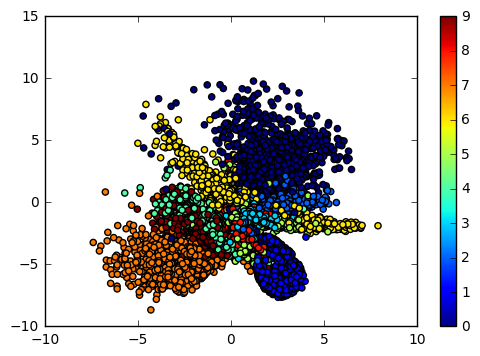

In [12]:
# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()